# Linear regression

We start by importing the necessary libraries for data generation, regression modeling, and model performance evaluation. A random seed is also set to ensure result reproducibility.

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
#np.random.seed(10)

# Creating data set

For this project, we will generate a synthetic dataset. The variable X is sampled from a uniform distribution, and Y is a linear function of X with added normal noise. The noise variance depends on X, simulating a case of heteroscedasticity.

In [11]:

n=1000
X = np.random.uniform(0,1,n)
eps = np.random.normal(2,1,n)
Y = 3*X+np.sqrt(X)*eps

# Prepping data

We split into three subsets: 70% for training, 15% for testing, and 15% for calibration. This structure supports a clear modeling process, including validation and adjustment

In [12]:

#Splitting off data into : training, test and calibration data

X_train,Y_train=X[:int(0.7*n)],Y[:int(0.7*n)]
X_test, Y_test=X[int(0.7*n):int(0.85*n)],Y[int(0.7*n):int(0.85*n)]
X_cal, Y_cal=X[int(0.85*n):],Y[int(0.85*n):]

# Training the linear regression model 


This cell prepares the data for polynomial regression by generating polynomial features (in this case, degree 1 = linear regression). It then initializes and trains a linear regression model on the training data.


In [13]:

#Transforming data
poly=PolynomialFeatures(degree=3)
coeff_train=poly.fit_transform(X_train.reshape(-1,1))
coeff_test=poly.fit_transform(X_test.reshape(-1,1))

#Importing linear regression model 
lin_reg_model=LinearRegression()

#Training model 
lin_reg_model.fit(coeff_train,Y_train)



LinearRegression()

# Data prediction

We used the trained model to generate predictions on the test set. These predictions will later be used to evaluate the model's performance and visualize its fit.

In [2]:
#Model prediction on test data
Y_pred=lin_reg_model.predict(coeff_test)

# Data visualization

This cell visualizes the training, test, and calibration datasets along with the regression line fitted on the training data. This helps to assess how well the linear model fits the data and generalizes to unseen samples.

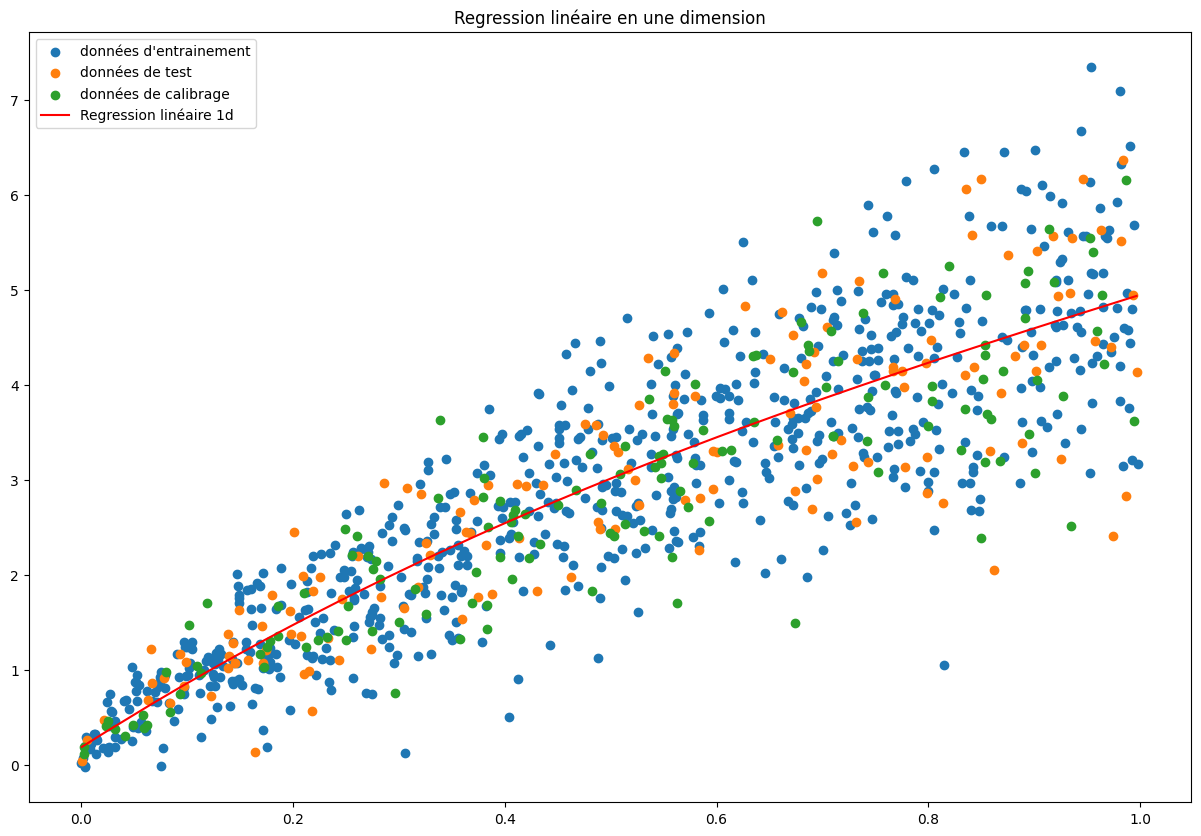

In [15]:

plt.figure(1, figsize=[15,10])

# 
plt.title('Regression linéaire en une dimension')
plt.scatter(X_train,Y_train,label='données d\'entrainement')
plt.scatter(X_test,Y_test,label='données de test')
plt.scatter(X_cal,Y_cal,label='données de calibrage')

#Predicted data
index=np.argsort(X_test)
X_test_sorted= X_test[index]
Y_pred_sorted= Y_pred[index]

plt.plot(X_test_sorted,Y_pred_sorted, label='Regression linéaire 1d', color="red")
plt.legend()

In [480]:
alpha= 0.1

coeff_calib=poly.fit_transform(X_cal.reshape(-1,1))
Y_pred_cal=lin_reg_model.predict(coeff_calib)

S = np.abs(Y_cal-Y_pred_cal)

quantile = np.quantile(S,1-alpha, method ='higher')


C_hat_lower_band= Y_pred - quantile
C_hat_upper_band= Y_pred + quantile


# visualising the prediction band, with 10% error level 

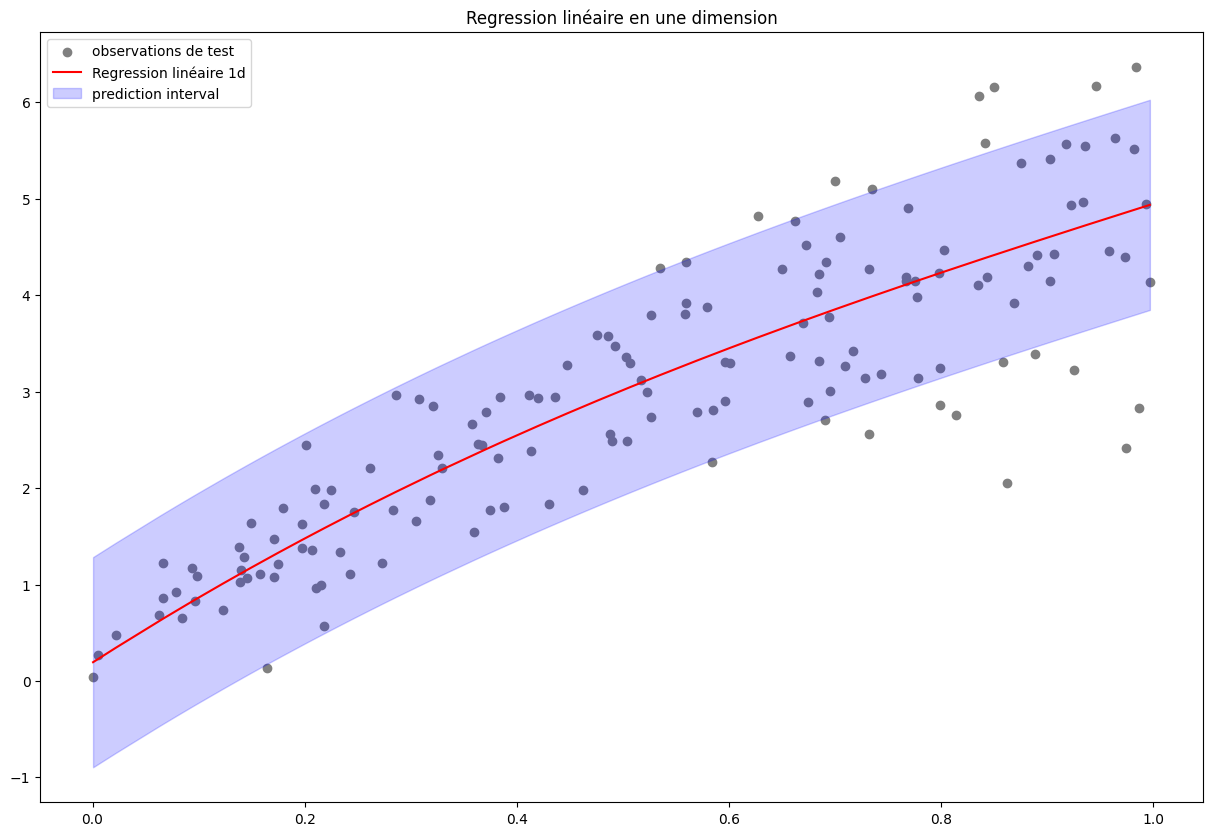

In [481]:
plt.figure(1, figsize=[15,10])

plt.title('Regression linéaire en une dimension')
plt.scatter(X_test,Y_test,color='grey',label='observations de test')

#Predicted data
plt.plot(X_test_sorted,Y_pred_sorted, label='Regression linéaire 1d', color="red")
"""plt.scatter(X_test,C_hat_lower_band,color='blue')
plt.scatter(X_test,C_hat_upper_band,color='blue')"""

index=np.argsort(X_test)
C_hat_lower_band_sorted= C_hat_lower_band[index]
C_hat_upper_band_sorted= C_hat_upper_band[index]

plt.fill_between(X_test_sorted,C_hat_lower_band_sorted,C_hat_upper_band_sorted,color='blue',alpha=0.2,label="prediction interval")

plt.legend()